In [1]:
import pandas as pd
import numpy as  np

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Data
data = pd.read_csv('hotel_booking.csv')

In [3]:
data.shape

(119390, 36)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
data.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [6]:
data.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [7]:
data.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [8]:
data.arrival_date_year.value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

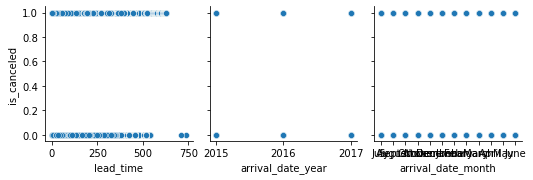

In [9]:
sns.pairplot(data,x_vars=data.columns[2:5],y_vars='is_canceled')

In [10]:
for i in data.columns.tolist():
    print(i)

hotel
is_canceled
lead_time
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
meal
country
market_segment
distribution_channel
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
assigned_room_type
booking_changes
deposit_type
agent
company
days_in_waiting_list
customer_type
adr
required_car_parking_spaces
total_of_special_requests
reservation_status
reservation_status_date
name
email
phone-number
credit_card


In [11]:
data.lead_time.value_counts()

0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
370       1
435       1
371       1
380       1
709       1
Name: lead_time, Length: 479, dtype: int64

In [12]:
data.arrival_date_month.value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

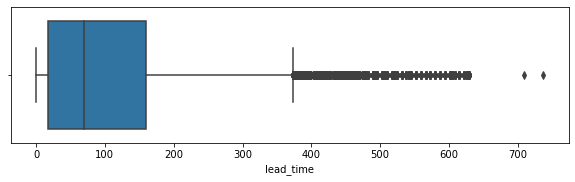

In [13]:
plt.figure(figsize=(10,2.5))
#plt.xlabel('lead_time',fontsize =50)
sns.boxplot(x = data.lead_time)
plt.show()

### Meal Type

In [14]:
data.meal.value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

```
BB --> bed and breakfast
HB --> breakfast and dinner
SC --> Catering, Holiday, Cottage
FB --> Breakfast, lunch and dinner
```

In [15]:
# Booking has been done from 178 countries
len(data.country.unique())

178

In [16]:
data.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [17]:
data.distribution_channel.value_counts()  # GDS - global destribution systems

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [18]:
data.is_repeated_guest.value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

In [19]:
data.deposit_type.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [20]:
data.agent.value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
304.0        1
431.0        1
278.0        1
450.0        1
114.0        1
Name: agent, Length: 333, dtype: int64

In [21]:
data.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [22]:
data.required_car_parking_spaces.value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [23]:
data.total_of_special_requests.value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [25]:
non = data[data.reserved_room_type != data.assigned_room_type]

In [26]:
len(non[data.is_canceled == 1])

<ipython-input-26-722dbd05509a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(non[data.is_canceled == 1])


802

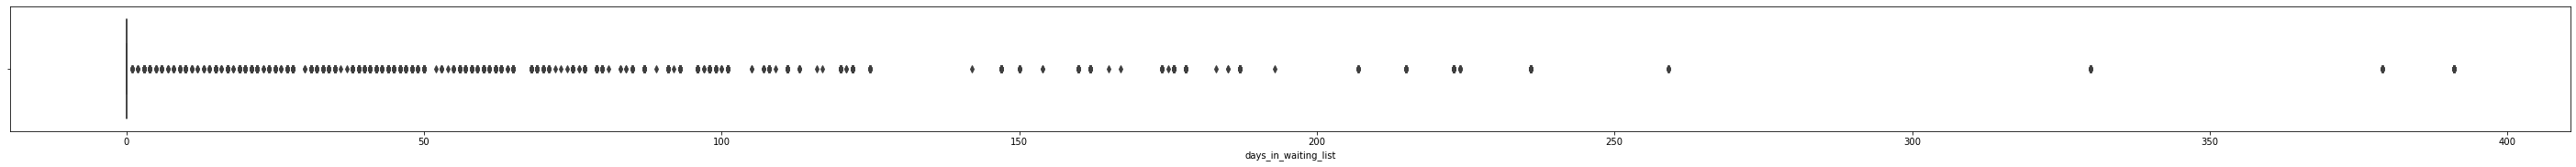

In [27]:
plt.figure(figsize=(50,2.5))
#plt.xlabel('lead_time',fontsize =50)
sns.boxplot(x = data.days_in_waiting_list)
plt.show()

In [28]:
len(data[data.days_in_waiting_list>20][data.is_canceled==1])

<ipython-input-28-42ef933c97b4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(data[data.days_in_waiting_list>20][data.is_canceled==1])


2097

In [29]:
col = ['is_canceled',
'lead_time',
'arrival_date_month',
'stays_in_weekend_nights',
'stays_in_week_nights',
'adults',
'meal',
'market_segment',
'distribution_channel',
'is_repeated_guest',
'previous_cancellations',
'previous_bookings_not_canceled',
'booking_changes',
'deposit_type',
'customer_type',
'adr',
'reservation_status']

In [30]:
filter_d = data[col]

In [31]:
filter_d.head()

,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,customer_type,adr,reservation_status
0,0,342,July,0,0,2,BB,Direct,Direct,0,0,0,3,No Deposit,Transient,0.0,Check-Out
1,0,737,July,0,0,2,BB,Direct,Direct,0,0,0,4,No Deposit,Transient,0.0,Check-Out
2,0,7,July,0,1,1,BB,Direct,Direct,0,0,0,0,No Deposit,Transient,75.0,Check-Out
3,0,13,July,0,1,1,BB,Corporate,Corporate,0,0,0,0,No Deposit,Transient,75.0,Check-Out
4,0,14,July,0,2,2,BB,Online TA,TA/TO,0,0,0,0,No Deposit,Transient,98.0,Check-Out


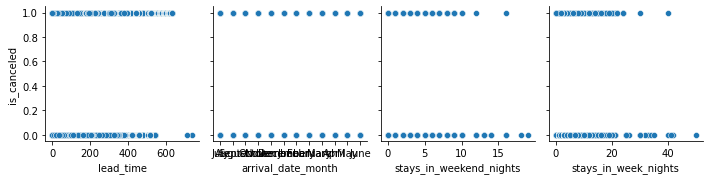

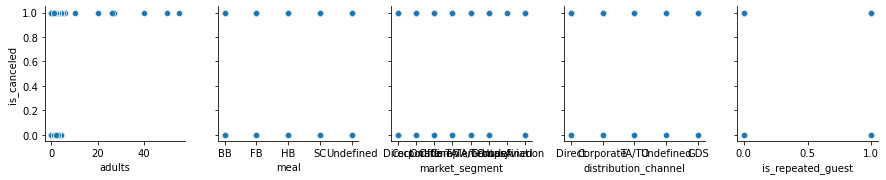

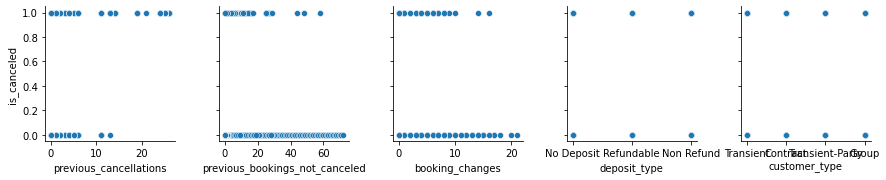

In [32]:
sns.pairplot(data = filter_d, x_vars = col[1:5],y_vars = ['is_canceled'])
sns.pairplot(data = filter_d, x_vars = col[5:10],y_vars = ['is_canceled'])
sns.pairplot(data = filter_d, x_vars = col[10:15],y_vars = ['is_canceled'])

<AxesSubplot:>

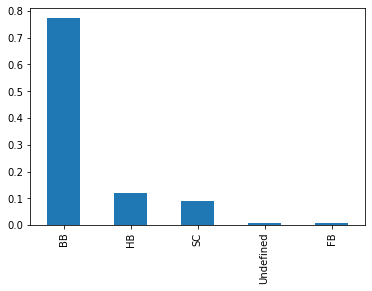

In [34]:
data.meal.value_counts(normalize=True).plot.bar()

In [40]:
data[(data.is_canceled == 1) & (data.reservation_status =='Check-Out')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card


In [38]:
data.reservation_status.value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

<AxesSubplot:>

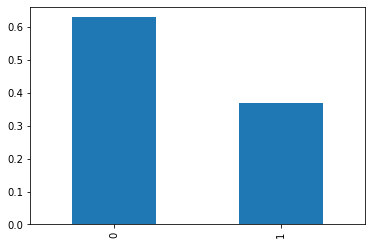

In [42]:
data.is_canceled.value_counts(normalize=True).plot.bar()

In [61]:
data.groupby('hotel')['is_canceled'].value_counts()

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: is_canceled, dtype: int64

More number of cancelations are from city hotel

In [110]:
var1 = data.groupby('hotel')['is_canceled'].value_counts().rename('total').reset_index()

,hotel,is_canceled,total
0,City Hotel,0,46228
1,City Hotel,1,33102
2,Resort Hotel,0,28938
3,Resort Hotel,1,11122


<AxesSubplot:xlabel='is_canceled', ylabel='total'>

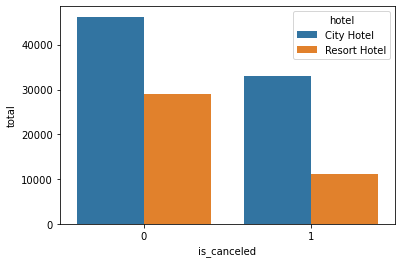

In [114]:
sns.barplot(data =var1, x = 'is_canceled', y ='total',hue='hotel' )

<AxesSubplot:>

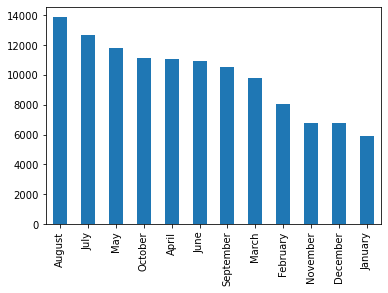

In [116]:
data.arrival_date_month.value_counts().plot.bar()